<span style="font-size:30px">**Medidas de centralidad de los nodos. Parte 3: Centralidad de Intermediación.**</span> 
    
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>

# Fundamentos de la centralidad de intermediación:

### Consideremos los caminos geodésicos asociados a los nodos de una red, los cuales son los caminos más cortos entre dos nodos en los que fluye la información (hablamos en plural porque habíamos mencionado que puede haber más de uno). Definimos el número $g_{st}^i$ como el número total de geodésicas del nodo arbitrario $s$ al nodo $t$ que pasan por el nodo $i$.

### Nótese que tenemos la propiedad $g_{ii}^i :=1$. Y en general:

<font size="5"> $g_{ss}^i :=\delta_{si} :=
\begin{cases}
1, & \text{si } s = i \\
0, & \text{si } s \neq i
\end{cases}$ </font>

### Y como abordamos esta serie de notebooks para redes simples, tenemos que:

<font size="5"> $g_{st}^i=g_{ts}^i=$ </font>

### Definimos la centralidad de intermediación como que un nodo $i$ es más importante mientras más geodésicas entre nodos pasen por él. Se toma como base la idea de qué tanto se pierde de información en la red si quitamos ese nodo $i$. Esto lo escribimos analíticamente mediante la expresión:

<font size="5"> $C_{bet} (i)= \sum_{s,t} \frac{g_{st}^i}{g_{st}}=\sum_{s} \frac{g_{ss}^i}{g_{ss}} + \sum_{s \neq t} \frac{g_{st}^i}{g_{st}}$ </font>

### En donde $g_{st}$ es el número total de caminos geodésicos del nodo $s$ al $t$.

### Para redes simples (no dirigidas) podemos escribir la expresión anterior mediante:

<font size="5"> $C_{bet} (i)= 1+ 2\sum_{s<t} \frac{g_{st}^i}{g_{st}}$ </font>

# Ejercicio:

### Siguiendo la misma estructura que en norebooks anteriores, implementar una centralidad de intermediación a la red *ca-netscience.mtx* usando NetworkX.

,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


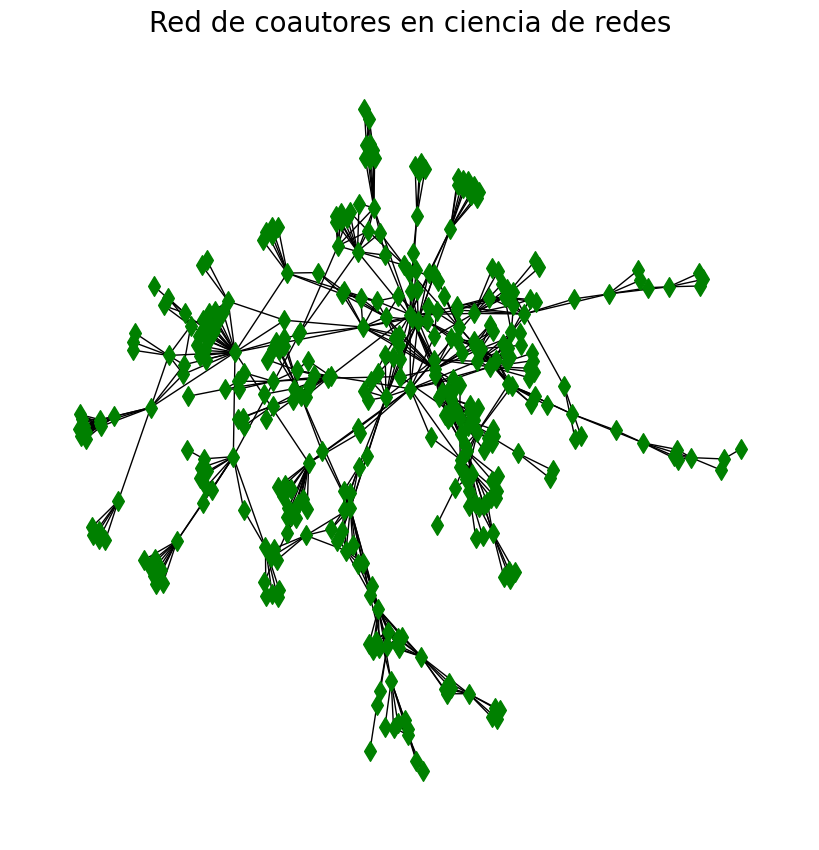

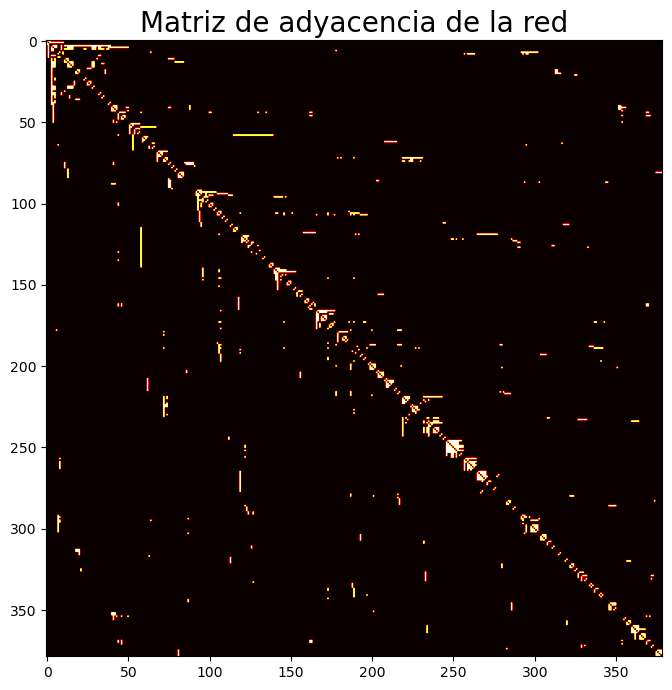

El orden de la matriz es de 379 x 379

La centralidad de intermediación asociada a los nodos de la red es:


{2: 0.0,
 1: 0.09146071419938531,
 3: 0.0,
 4: 0.1520563824733063,
 5: 0.25062807899754763,
 16: 0.015877891026305803,
 44: 0.17487795951990634,
 113: 0.06458243852541591,
 131: 0.045448457607945615,
 250: 0.00018525535766915075,
 259: 0.0,
 13: 0.04211420084572179,
 14: 0.0,
 15: 0.055437328590038026,
 45: 0.0014654636481085841,
 46: 0.0,
 47: 0.0,
 61: 0.0,
 126: 0.0034852333702908443,
 127: 0.0034852333702908443,
 128: 0.0140391749587152,
 146: 0.010553941588424346,
 152: 0.0,
 153: 0.0,
 154: 0.0,
 164: 0.0,
 165: 0.0,
 166: 0.0,
 176: 0.0,
 177: 0.0,
 249: 0.0,
 274: 0.0,
 313: 0.0,
 314: 0.0,
 323: 0.0,
 324: 0.0,
 330: 0.0,
 371: 0.0,
 373: 4.6781655977058275e-06,
 374: 0.0,
 199: 0.0046667512327683985,
 201: 0.0700036556166419,
 202: 0.0046667512327683985,
 204: 0.00039351726543844777,
 231: 0.23165391320171955,
 235: 0.0,
 236: 0.012658690817560601,
 237: 0.0,
 238: 0.0,
 254: 0.0,
 298: 0.0003537528578579482,
 7: 0.02100964169929687,
 6: 0.0,
 8: 0.14842752030043013,
 190: 1.


El nodo más importante con base al criterio de centralidad de intermediación es: 
 El nodo 26

Cuya centralidad tiene valor: 
 0.39718418135681216


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Leemos y mostramos la red con un formato adecuado:
datos=pd.read_csv('ca-netscience.mtx',skiprows = 2, header = None,sep = ' ' )
display(datos)

#Generar una red de NetworkX a partir del data frame Pandas:
G=nx.from_pandas_edgelist(datos,source = 0,target = 1) #Formato: (Nodo origen ,  Nodo destino)
plt.figure( figsize = [8,8] )
nx.draw(G,node_size = 100, node_color = 'g',node_shape = 'd') 
plt.title("Red de coautores en ciencia de redes",fontsize=20)
plt.show()

#Matriz de adyacencia (únicamente para ver la estructura de la red):
plt.figure( figsize = [8,8] )
A=nx.to_numpy_array(G)
plt.imshow(A,"hot") #Para ver las intensidades de la imagen que representan a los enlaces podemos usar el formato de mapa de calor
plt.title("Matriz de adyacencia de la red",fontsize=20)
plt.show()
N1,N2=A.shape
print(f"El orden de la matriz es de {N1} x {N2}")
print()

#Centralidad de intermediación:
intermediación=nx.betweenness_centrality(G)
print("La centralidad de intermediación asociada a los nodos de la red es:")
display(intermediación)
print()

#Centralidad máxima:
centralidad_máxima=max(intermediación.values())
nodo_máx=max(intermediación, key=intermediación.get)
print(f"El nodo más importante con base al criterio de centralidad de intermediación es: \n El nodo {nodo_máx}")
print()
print(f"Cuya centralidad tiene valor: \n {centralidad_máxima}")

# Fin del ejercicio.